In [49]:
import pandas as pd
import numpy as np
from numpy import nan
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split, cross_val_score 
import statsmodels.api as sm

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import roc_curve, auc, roc_auc_score


plt.rcParams.update({'font.size': 17})

df_train=pd.read_csv('Ravdess_TRAIN_transformed.csv')
df_test=pd.read_csv('Ravdess_TEST_transformed.csv')

In [50]:
X, y = df_train.drop(["emotion", "vocal_channel", "emotional_intensity", "statement", "repetition", "actor", "sex","mfcc_q05"], axis=1), df_train[["mfcc_q05"]].values.flatten()

In [2]:
X_train, y_train = df_train.drop(["emotion", "vocal_channel", "emotional_intensity", "statement", "repetition", "actor", "sex","mfcc_q05"], axis=1), df_train[["mfcc_q05"]].values.flatten()
X_test, y_test = df_test.drop(["emotion", "vocal_channel", "emotional_intensity", "statement", "repetition", "actor", "sex","mfcc_q05"], axis=1), df_test[["mfcc_q05"]].values.flatten()

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [51]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
clf = XGBRegressor(objective='reg:squarederror', 
                    max_depth = 6,
                    learning_rate = 0.1,
                    reg_lambda = 2,
                    n_estimators = 150
                   )
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('R2: %f' % r2_score(y_test, y_pred))
print('MSE: %f' % mean_squared_error(y_test, y_pred))
print('MAE: %f' % mean_absolute_error(y_test, y_pred))

R2: 0.958563
MSE: 0.025123
MAE: 0.091273


Text(0, 0.5, 'Predicted')

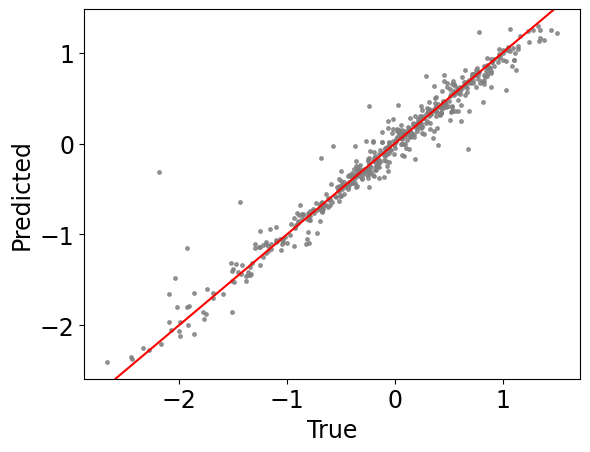

In [61]:
plt.plot( y_test, y_pred, 'o', markersize=2.5, color="grey", alpha=0.8)
plt.axline((1, 1), slope=1,c="red")
plt.xlabel("True")
plt.ylabel("Predicted")

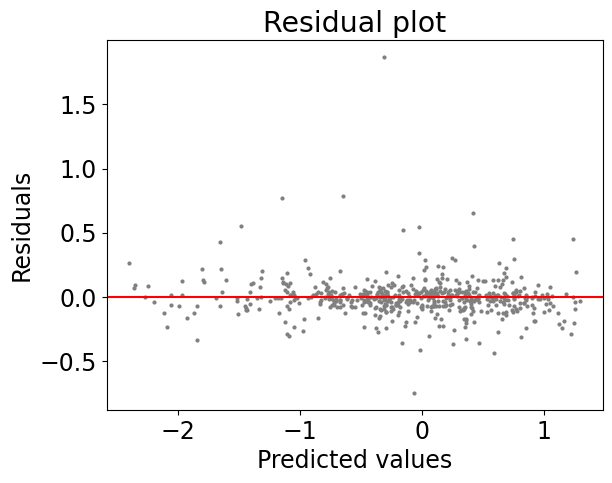

In [62]:
residuals = y_pred - y_test

# create the plot

plt.plot( y_pred, residuals, 'o', markersize=2, color="gray", alpha=1, label='Inliers')
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residual plot')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()